In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## READ AND ANALYZE DATA

In [3]:
filepath='judge-1377884607_tweet_product_company.csv'
data =pd.read_csv(filepath, encoding='unicode_escape')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
data.tweet_text.value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                 5
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                              4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                 4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                              3
RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter                                       2
                                                                                                                                              ..
Great interview to @mention on Bloomberg TV about #Ipad2 to kick off #SxSW.#apple {link}                                          

In [7]:
data.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [8]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

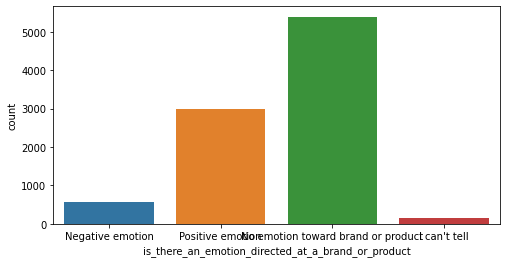

In [9]:
fig =  plt.figure(figsize=(8,4))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

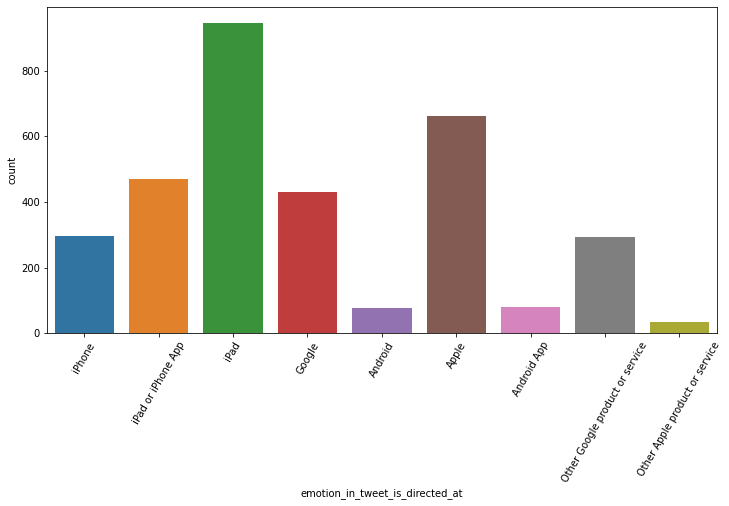

In [10]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=data)
plt.xticks(rotation=60)

In [11]:
## DATA CLEANING

In [12]:
df = data.copy(deep=True)
df.drop_duplicates(subset=['tweet_text'], inplace=True) # contains duplicate entries
df.dropna(subset=['tweet_text'], inplace=True) # only one missing row
df.rename(columns = {'emotion_in_tweet_is_directed_at':'brand_item', 'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'}, inplace=True)

In [13]:
df.head()

,tweet_text,brand_item,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [14]:
# Convert the data types to string
df['tweet_text'] = df['tweet_text'].astype(str)
df['brand_item'] = df['brand_item'].astype(str)

In [15]:
# Brand name mapping (similar to same category)
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }

df['brand_name'] = df['brand_item'].map(brand)

In [16]:
# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'confused'}

df['emotion'] = df['emotion'].map(label_encoder)


Text(0, 0.5, 'Count')

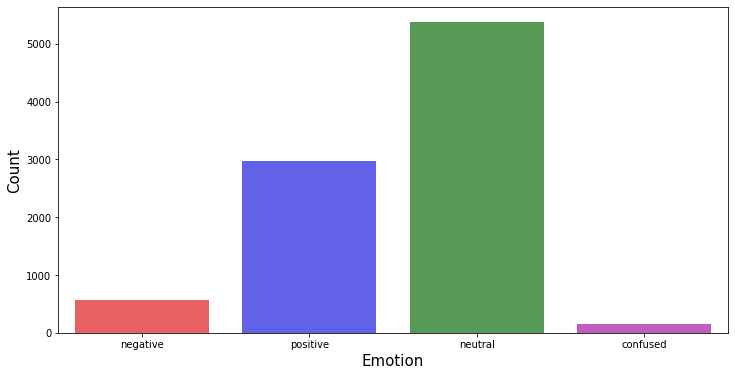

In [18]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion', data=df,  
              palette={'positive':'b', 'negative':'r', 'neutral':'g','confused':'m'}, alpha=0.7)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

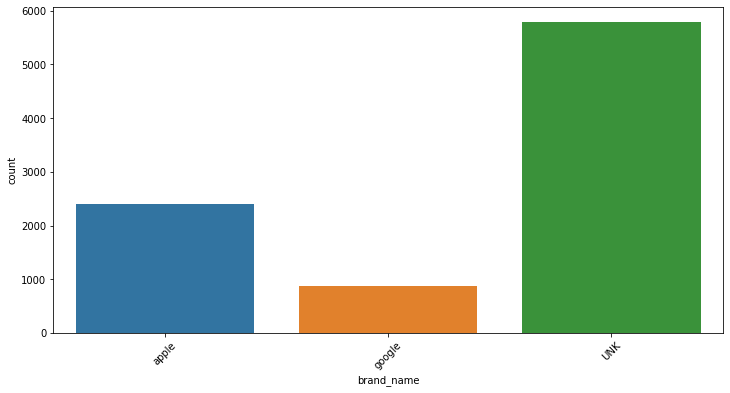

In [19]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_name', data=df)
plt.xticks(rotation=45)

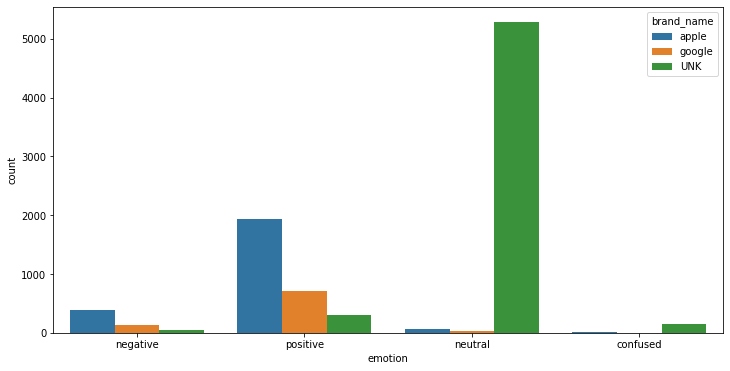

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'emotion', hue='brand_name')

In [21]:
## TEXT PROCESSING

In [22]:
df.tweet_text.head(10)

0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1     @jessedee Know about @fludapp ? Awesome iPad/i...
2     @swonderlin Can not wait for #iPad 2 also. The...
3     @sxsw I hope this year's festival isn't as cra...
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...
5     @teachntech00 New iPad Apps For #SpeechTherapy...
7     #SXSW is just starting, #CTIA is around the co...
8     Beautifully smart and simple idea RT @madebyma...
9     Counting down the days to #sxsw plus strong Ca...
10    Excited to meet the @samsungmobileus at #sxsw ...
Name: tweet_text, dtype: object

In [23]:
df_tt=df.tweet_text

In [24]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
import re
import string

data=df
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text_tokenize = re.split('\W+', text)
    text_nostop = [word for word in text_tokenize if word not in stopwords]
    #text_stemm = [ps.stem(x) for x in text_nostop]
    text_lemm = [wn.lemmatize(x) for x in text_nostop]
    return text_lemm

data['tweet_text_lemm'] = data['tweet_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,tweet_text,brand_item,emotion,brand_name,tweet_text_lemm
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,apple,"[wesley83, 3g, iphone, 3, hr, tweeting, riseau..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,apple,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,apple,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,apple,"[sxsw, hope, year, festival, isnt, crashy, yea..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['tweet_text'])
print(X_counts.shape)
#print(count_vect.get_feature_names())
print(count_vect.get_feature_names_out())

(9065, 12763)
['' '0' '02' ... 'ë' 'öÝ' 'ü']


In [28]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,02,03,0310,0310apple,031111,031211,031311,031411,...,âã,ã,äÁ,å,åÇ,åÇwhats,åÈ,ë,öÝ,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
## CNN-LSTM

In [30]:
X = X_counts_df
y_ohe = pd.get_dummies(df['emotion'])


In [31]:
X.shape,y_ohe.shape

((9065, 12763), (9065, 4))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.10, stratify=y_ohe,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train,
                                                  random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((6934, 12763), (1224, 12763), (907, 12763), (6934, 4), (1224, 4), (907, 4))

In [34]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
validation_x = validation_x.reshape((validation_x.shape[0],1,validation_x.shape[1]))
train_x.shape, validation_x.shape

((6934, 1, 12763), (1224, 1, 12763))

In [37]:
from keras.layers.regularization.dropout import Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(1,train_x.shape[2])))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               7748400   
                                                                 
 batch_normalization_1 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                      

In [38]:
history1=model.fit(train_x,train_y,batch_size=32, epochs=50,verbose=2,validation_data=(validation_x, validation_y ))

Epoch 1/50
217/217 - 4s - loss: 0.9152 - accuracy: 0.6024 - val_loss: 0.9986 - val_accuracy: 0.6258 - 4s/epoch - 18ms/step
Epoch 2/50
217/217 - 2s - loss: 0.5610 - accuracy: 0.7835 - val_loss: 0.8502 - val_accuracy: 0.6667 - 2s/epoch - 8ms/step
Epoch 3/50
217/217 - 2s - loss: 0.3433 - accuracy: 0.8714 - val_loss: 0.9286 - val_accuracy: 0.6503 - 2s/epoch - 8ms/step
Epoch 4/50
217/217 - 3s - loss: 0.2386 - accuracy: 0.9071 - val_loss: 1.2792 - val_accuracy: 0.6520 - 3s/epoch - 15ms/step
Epoch 5/50
217/217 - 2s - loss: 0.1843 - accuracy: 0.9260 - val_loss: 1.5320 - val_accuracy: 0.6422 - 2s/epoch - 11ms/step
Epoch 6/50
217/217 - 2s - loss: 0.1717 - accuracy: 0.9335 - val_loss: 1.5842 - val_accuracy: 0.6413 - 2s/epoch - 8ms/step
Epoch 7/50
217/217 - 2s - loss: 0.1471 - accuracy: 0.9363 - val_loss: 1.8092 - val_accuracy: 0.6258 - 2s/epoch - 8ms/step
Epoch 8/50
217/217 - 2s - loss: 0.1494 - accuracy: 0.9391 - val_loss: 1.8930 - val_accuracy: 0.6422 - 2s/epoch - 8ms/step
Epoch 9/50
217/217 - 

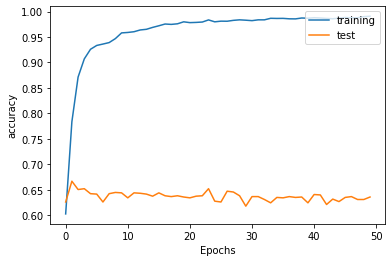

In [41]:
metrics='accuracy'
plt.plot(history1.history[metrics])
plt.plot(history1.history['val_'+ metrics])
plt.xlabel('Epochs')
plt.ylabel(metrics)
plt.legend(['training', 'test'], loc='upper right')
plt.show()

In [42]:
test_x=np.asarray(X_test)
test_x=test_x.reshape((test_x.shape[0],1,test_x.shape[1]))
test_y = np.asarray(y_test)

y_pred = model.predict(test_x)
y_pred

29/29 [==============================] - 0s 3ms/step


array([[6.4903717e-14, 1.0285638e-12, 2.0836577e-08, 1.0000000e+00],
       [8.7047248e-08, 2.2534823e-02, 1.3618774e-03, 9.7610325e-01],
       [2.3981640e-08, 6.8097989e-08, 2.0773947e-02, 9.7922587e-01],
       ...,
       [2.2040085e-09, 3.7847653e-10, 9.9964821e-01, 3.5173021e-04],
       [4.8852075e-06, 3.6567175e-03, 9.9546403e-01, 8.7431527e-04],
       [6.5140816e-11, 9.4217696e-11, 9.9999416e-01, 5.8623727e-06]],
      dtype=float32)

In [46]:
test_y

array([2, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 1, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 2, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 3, 2,
       2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 0, 3, 2, 2, 0, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 1, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,

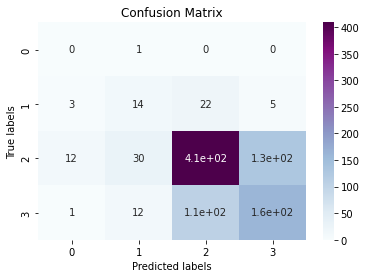

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

test_pred=np.argmax(y_pred,axis=1)

def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
plot_conf(test_pred,test_y)    